In [1]:
import pandas as pd
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_total = pd.read_csv("terrain.csv")

In [3]:
df_total.head()

,bumpiness,grade,target
0,0.639427,0.099355,0.0
1,0.025011,0.685680,0.0
2,0.275029,0.544466,0.0
3,0.223211,0.977843,1.0
4,0.736471,0.358674,1.0


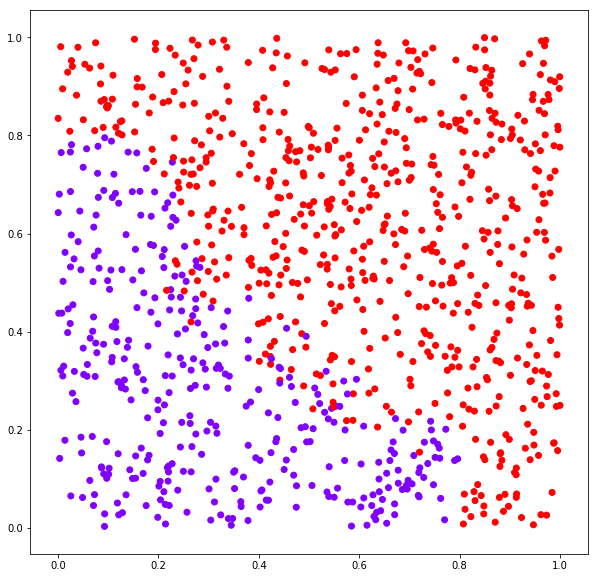

In [4]:
X = df_total[["bumpiness","grade"]].values
y = df_total["target"]
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],c=y,cmap="rainbow")
plt.show()

In [5]:
from scipy import stats
import numpy as np

def entropy(attribute_data):
    _, val_freqs = np.unique(attribute_data, return_counts=True)
    val_probs = val_freqs / float(len(attribute_data))
    return -val_probs.dot(np.log(val_probs))

In [6]:
def cut_df(df,feature,percentile):
    return (df[feature].sort_values().iloc[:int(len(df)*percentile/100)].index,
            df[feature].sort_values().iloc[int(len(df)*percentile/100):].index)

def entropy_gain(df,feature,percentile):
    left,right = cut_df(df,feature,percentile)
    return entropy(df["target"]) \
         - entropy(df["target"].loc[left])*percentile/100 \
         - entropy(df["target"].loc[right])*(100-percentile)/100

In [7]:
entropy(df_total["target"])

0.6492840023426005

0.13925162014638234


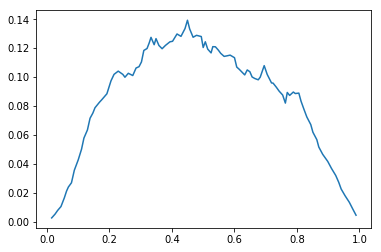

In [8]:
feature = "grade"
gains = [entropy_gain(df_total,feature,i) for i in range(1,100)]
values = [df_total[feature].sort_values().iloc[int(len(df_total)*i/100)] for i in range(1,100)]
plt.plot(values,gains)
print(max(gains))

0.11958742410000983


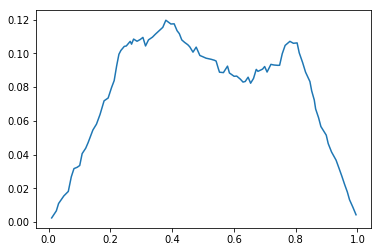

In [9]:
feature = "bumpiness"
gains = [entropy_gain(df_total,feature,i) for i in range(1,100)]
values = [df_total[feature].sort_values().iloc[int(len(df_total)*i/100)] for i in range(1,100)]
plt.plot(values,gains)
print(max(gains))

In [10]:
# So we cut by grade in 0.5

In [11]:
df_left = df_total[df_total["grade"]<=0.45]

0.04375808017606947


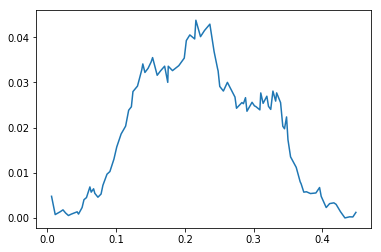

In [12]:
feature = "grade"
gains = [entropy_gain(df_left,feature,i) for i in range(1,100)]
values = [df_left[feature].sort_values().iloc[int(len(df_left)*i/100)] for i in range(1,100)]
plt.plot(values,gains)
print(max(gains))

0.2668488593025776


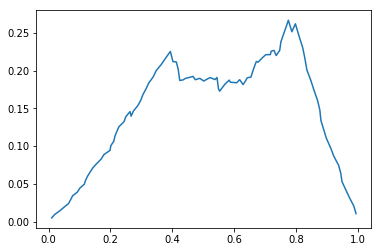

In [13]:
feature = "bumpiness"
gains = [entropy_gain(df_left,feature,i) for i in range(1,100)]
values = [df_left[feature].sort_values().iloc[int(len(df_left)*i/100)] for i in range(1,100)]
plt.plot(values,gains)
print(max(gains))

In [14]:
# So we would do the cut in 0.78 for bumpiness

# sklearn Implementation

In [15]:
# Import the libs
from sklearn.tree import DecisionTreeClassifier

In [16]:
# Create the estimator and train it
clf=DecisionTreeClassifier(min_samples_leaf=30)

In [17]:
X = df_total[["bumpiness","grade"]].values
y = df_total["target"]

In [18]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=30, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

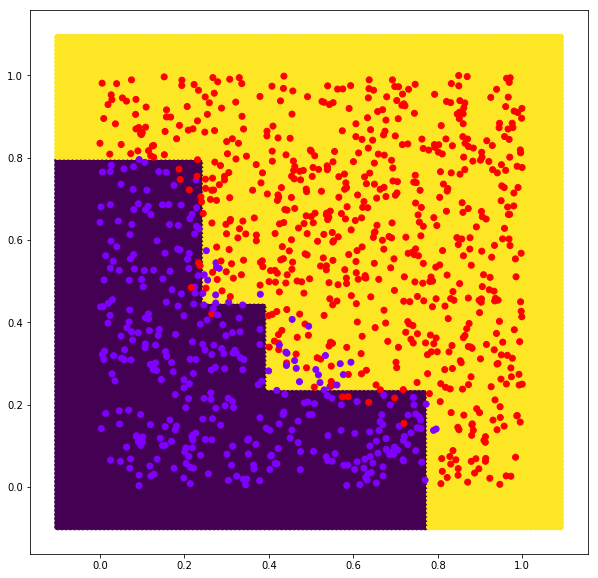

In [19]:
h = .01
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.scatter(xx, yy,c=Z)
plt.scatter(X[:,0],X[:,1],c=y,cmap="rainbow")
plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
clf1=GridSearchCV(estimator=DecisionTreeClassifier(min_samples_leaf=10),
                  param_grid={"min_samples_leaf":np.arange(5,50)})
clf1.fit(X,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [22]:
clf1.best_params_

{'min_samples_leaf': 6}

In [23]:
from IPython.display import Image
from sklearn import tree
import pydotplus

In [24]:
dot_data= tree.export_graphviz(clf,out_file=None)

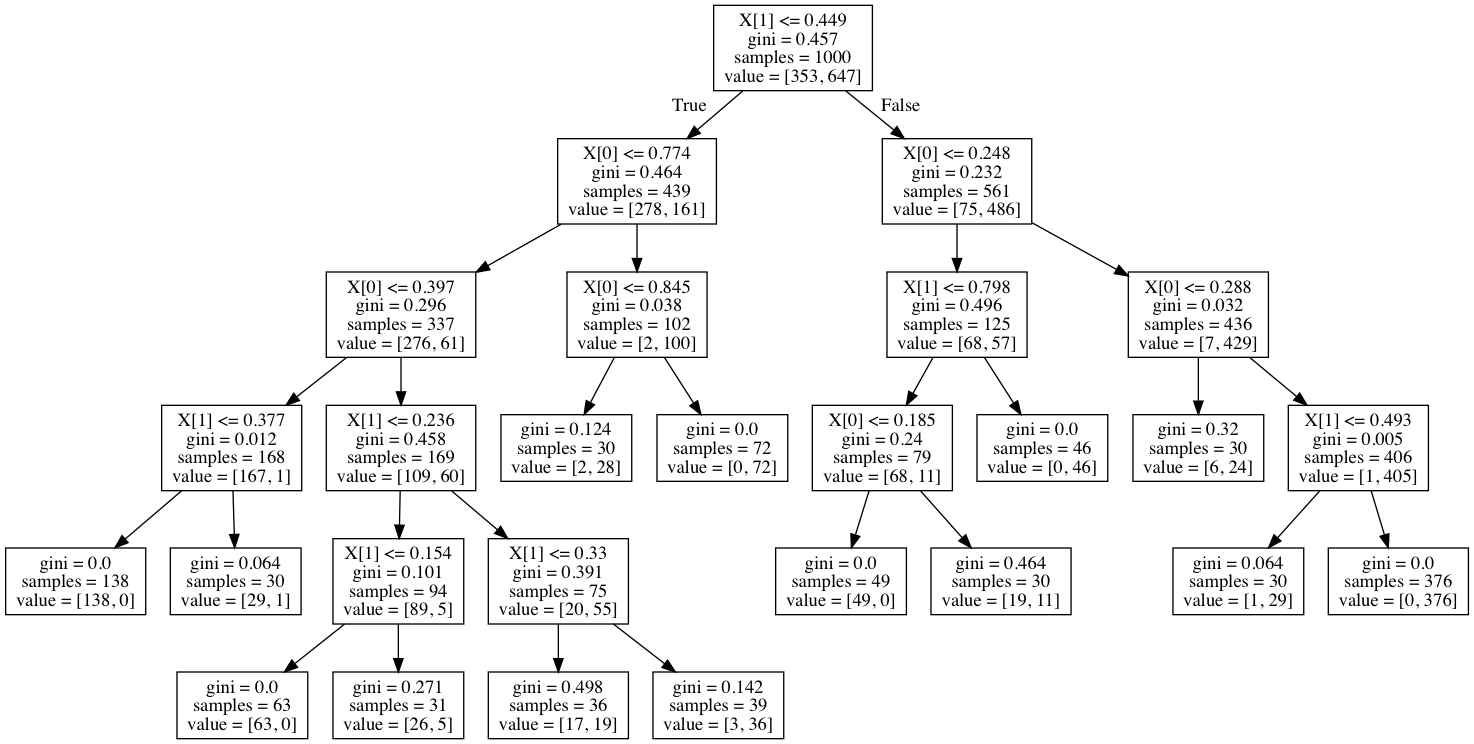

In [25]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

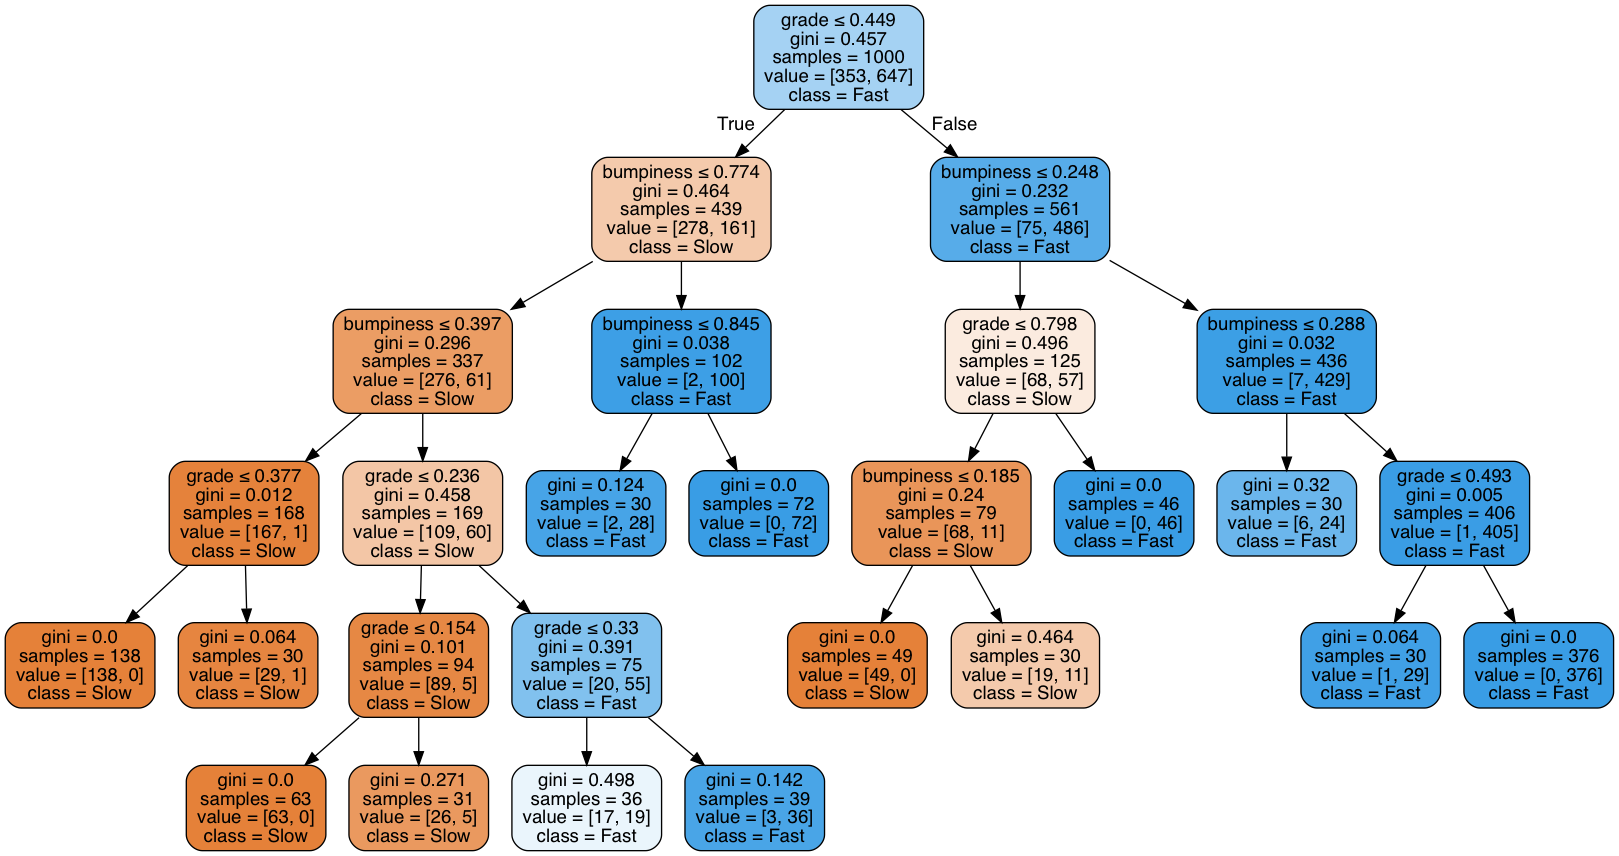

In [26]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=["bumpiness", "grade"], 
                         class_names=["Slow","Fast"], 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())